<h2 style="text-align: center; font-weight: bold;"> Credit Risk Modelling - Loan Classification </h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings( 'ignore' )

## Loading Data

In [2]:
df=pd.read_csv('loan_detection.csv')

In [3]:
df.head(5)

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


## Data Understanding

In [4]:
df.shape

(41188, 60)

In [5]:
df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [7]:
df.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning

In [8]:
[i for i in df.isnull().sum() if i>0] # Checking for missing values

[]

In [9]:
(df.duplicated().sum()/41188)*100   # Checking the percentage duplicate values

5.868214042925124

In [10]:
df=df.drop_duplicates() # Dropping The Duplicate Values

In [11]:
df.duplicated().sum() 

0

In [12]:
# Finding percent of Loan Approval and Loan Not Approval
print(df['Loan_Status_label'].value_counts())
print()
print("Loan Rejected  - ",(len(df[df['Loan_Status_label'] == 0])/len(df)*100))
print("Loan Approved - ",(len(df[df['Loan_Status_label'] == 1])/len(df)*100))

Loan_Status_label
0    34179
1     4592
Name: count, dtype: int64

Loan Rejected  -  88.15609605117227
Loan Approved -  11.843903948827732


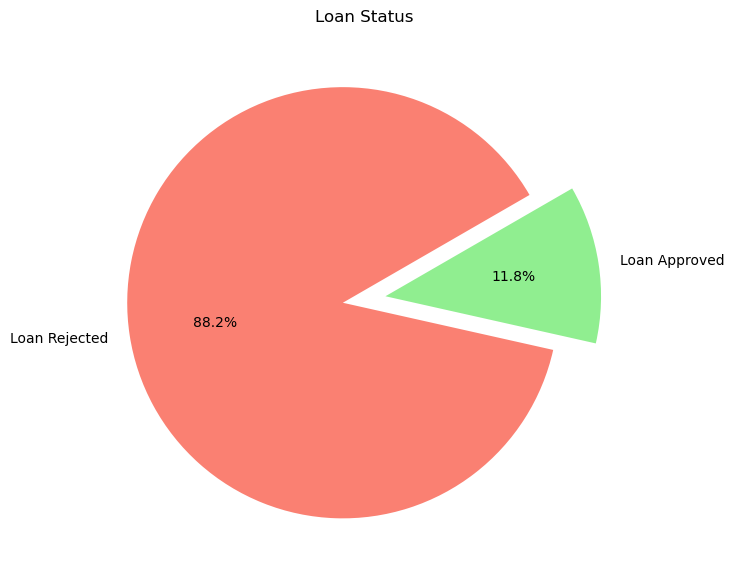

In [13]:
# Plotting the Rejections and Approvals in pie chart
plt.figure(figsize=(7,7))
plt.pie(df['Loan_Status_label'].value_counts(), labels=['Loan Rejected', 'Loan Approved'], autopct='%1.1f%%', startangle=30, 
        explode=[0.1,0.1], colors=['salmon', 'lightgreen'])
plt.title('Loan Status')
plt.show()

# Feature Selection

In [14]:
# Defining the Correlation Matrix
correlation_matrix = df.corr()

# Finding correlation between other columns and 'Loan_Status_label'
print(pd.DataFrame(correlation_matrix['Loan_Status_label']))

                               Loan_Status_label
age                                     0.026865
campaign                               -0.074539
pdays                                  -0.324611
previous                                0.228665
no_previous_contact                    -0.324572
not_working                             0.118294
job_admin.                              0.035250
job_blue-collar                        -0.075625
job_entrepreneur                       -0.019306
job_housemaid                          -0.007496
job_management                         -0.001627
job_retired                             0.091108
job_self-employed                      -0.006224
job_services                           -0.033042
job_student                             0.092536
job_technician                         -0.003678
job_unemployed                          0.012016
job_unknown                            -0.002082
marital_divorced                       -0.013390
marital_married     

In [15]:
# Filter correlations with 'Loan_Status_label' greater than 0.2 or less than -0.2
correlation_with_target = correlation_matrix['Loan_Status_label']
filtered_correlation = correlation_with_target[(correlation_with_target > 0.2) | (correlation_with_target < -0.2)]

# Display the filtered correlations
print(filtered_correlation)

pdays                 -0.324611
previous               0.228665
no_previous_contact   -0.324572
poutcome_success       0.316035
Loan_Status_label      1.000000
Name: Loan_Status_label, dtype: float64


<h3 style="color: blue; font-weight: bold;">Selected Columns: &nbsp;&nbsp;pdays, previous, no_previous_contact, poutcome_success</h3>

In [16]:
selected_features = ['pdays', 'previous', 'no_previous_contact', 'poutcome_success', 'Loan_Status_label']

# Dropping all columns except specified ones
df = df.drop(columns=[col for col in df.columns if col not in selected_features])

In [17]:
df.head(3)

,pdays,previous,no_previous_contact,poutcome_success,Loan_Status_label
0,999,0,1,0,0
1,999,0,1,0,0
2,999,0,1,0,0


In [18]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [19]:
df['pdays'] = df['pdays'].replace(999,0)

In [20]:
df['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [21]:
df['no_previous_contact'].unique()

array([1, 0], dtype=int64)

In [22]:
df['poutcome_success'].unique()

array([0, 1], dtype=int64)

## Model Building

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [24]:
X = df.drop(columns='Loan_Status_label',axis=1)
y=df['Loan_Status_label']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [28]:
X_train

array([[-0.1717121 , -0.35920693,  0.20501031, -0.19507302],
       [-0.1717121 ,  1.5953829 ,  0.20501031, -0.19507302],
       [-0.1717121 , -0.35920693,  0.20501031, -0.19507302],
       ...,
       [-0.1717121 , -0.35920693,  0.20501031, -0.19507302],
       [-0.1717121 , -0.35920693,  0.20501031, -0.19507302],
       [-0.1717121 , -0.35920693,  0.20501031, -0.19507302]])

In [29]:
y_train.head(2)

34767    0
32132    0
Name: Loan_Status_label, dtype: int64

### Logistic Regression

Accuracy on Test Data: 89.85170857511284
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6894
           1       0.64      0.20      0.30       861

    accuracy                           0.90      7755
   macro avg       0.77      0.59      0.62      7755
weighted avg       0.88      0.90      0.87      7755



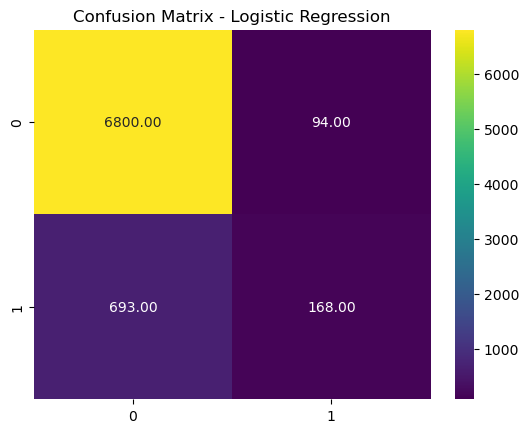

In [30]:
# Initialize and train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
lr_y_pred = lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Accuracy on Test Data: {accuracy*100}")

# Generate and print the classification report
print(classification_report(y_test, lr_y_pred))

# Generate and display the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, lr_y_pred)
plt.title("Confusion Matrix - Logistic Regression")
sns.heatmap(conf_matrix_lr, cmap='viridis', annot=True, fmt=".2f")
plt.show()

In [31]:
y_test[:3]

37815    0
5279     0
40810    0
Name: Loan_Status_label, dtype: int64

In [32]:
lr_y_pred[:3]

array([0, 0, 0], dtype=int64)

In [33]:
lr_y_pred_test = lr.predict(X_test)
lr_y_pred_train = lr.predict(X_train)

In [34]:
#Training prediction accuracy
lr_train_accuracy = accuracy_score(y_train, lr_y_pred_train)
lr_test_accuracy = accuracy_score(y_test, lr_y_pred_test)

In [35]:
print('Accuracy For Training Data: ',lr_train_accuracy*100)
print('Accuracy For Test Data: ',lr_test_accuracy*100)

Accuracy For Training Data:  89.07660562290431
Accuracy For Test Data:  89.85170857511284


## KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# Initialize and train the KNeighboursClassifier model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [38]:
# Printing The Accuracy Score On Test Data
y_pred_knn = knn.predict(X_test)

# Make predictions on the test set
knn_y_pred = knn.predict(X_test)

# Accuracy Score
print(f'Accuracy For Test Data: ',accuracy_score(y_test, knn_y_pred)*100)

Accuracy For Test Data:  89.6969696969697


In [39]:
# Generating Classification Report 
print(f'Classification Report For KNN For Test Data: \n',classification_report(y_test, knn_y_pred))

Classification Report For KNN For Test Data: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      6894
           1       0.66      0.15      0.24       861

    accuracy                           0.90      7755
   macro avg       0.78      0.57      0.59      7755
weighted avg       0.88      0.90      0.87      7755



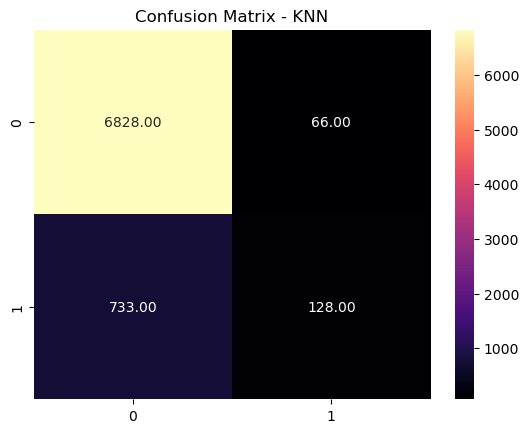

In [40]:
# Generation Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(conf_matrix_knn, cmap='magma',fmt='.2f',annot=True)
plt.title("Confusion Matrix - KNN")
plt.show()

In [41]:
y_pred_knn_train = knn.predict(X_train)
y_pred_knn_test = knn.predict(X_test)

In [42]:
accuracy_knn_train = accuracy_score(y_train,y_pred_knn_train)
accuracy_knn_test = accuracy_score(y_test,y_pred_knn_test)

In [43]:
print(f"Training Accuracy: ",accuracy_knn_train*100)
print(f"Test Accuracy: ",accuracy_knn_test*100)

Training Accuracy:  89.13141604333248
Test Accuracy:  89.6969696969697


## Adaboost

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
# Initialize and train the Logistic Regression model
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [46]:
y_pred_ada_train = ada.predict(X_train)
y_pred_ada_test = ada.predict(X_test)

In [47]:
accuracy_ada_train = accuracy_score(y_train,y_pred_ada_train)
accuracy_ada_test = accuracy_score(y_test,y_pred_ada_test)

In [48]:
print(f"Training Accuracy: ",accuracy_ada_train*100)
print(f"Test Accuracy: ",accuracy_ada_test*100)

Training Accuracy:  89.10239876192932
Test Accuracy:  89.94197292069632


In [49]:
# Generating Classification Report 
print(f'Classification Report For AdaboostClassifier For Test Data: \n',classification_report(y_test, y_pred_ada_test))

Classification Report For AdaboostClassifier For Test Data: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      6894
           1       0.66      0.20      0.30       861

    accuracy                           0.90      7755
   macro avg       0.78      0.59      0.62      7755
weighted avg       0.88      0.90      0.87      7755



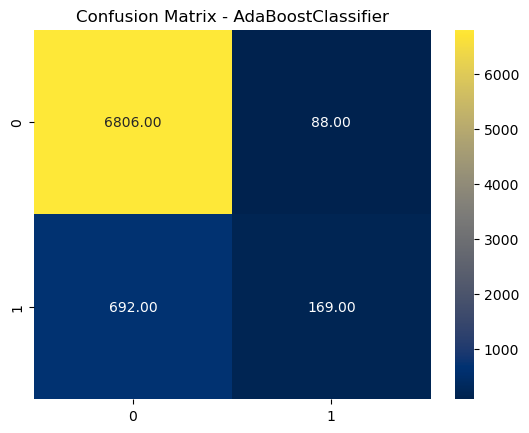

In [54]:
# Generation Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_ada_test)
sns.heatmap(conf_matrix_knn, cmap='cividis',fmt='.2f',annot=True)
plt.title("Confusion Matrix - AdaBoostClassifier")
plt.show()

## Decision Tree

- ## Post Pruning

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
# Initialize and train the model 
dtree_post = DecisionTreeClassifier(max_depth=12)
dtree_post.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12)

In [58]:
y_pred_dtree_post_train = dtree_post.predict(X_train)
y_pred_dtree_post_test = dtree_post.predict(X_test)

In [59]:
accuracy_dtree_post_train = accuracy_score(y_train,y_pred_dtree_post_train)
accuracy_dtree_post_test = accuracy_score(y_test,y_pred_dtree_post_test)


In [60]:
print(f"Training Accuracy: ",accuracy_dtree_post_train*100)
print(f"Test Accuracy: ",accuracy_dtree_post_test*100)

Training Accuracy:  89.23136445705441
Test Accuracy:  89.91618310767247


In [61]:
# Generating Classification Report 
print(f'Classification Report For KNN For Test Data: \n',classification_report(y_test, y_pred_dtree_post_test))

Classification Report For KNN For Test Data: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      6894
           1       0.67      0.18      0.28       861

    accuracy                           0.90      7755
   macro avg       0.79      0.58      0.61      7755
weighted avg       0.88      0.90      0.87      7755



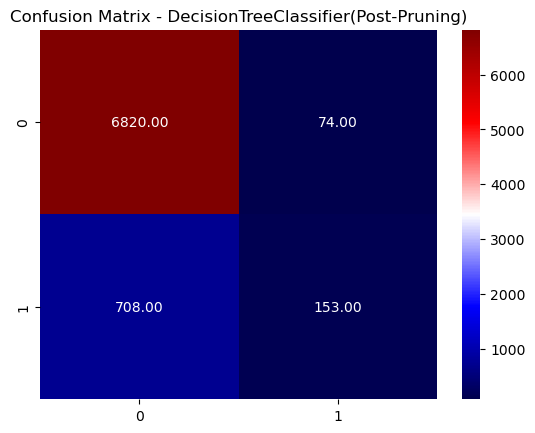

In [70]:
# Generation Confusion Matrix
conf_matrix_dtree_post = confusion_matrix(y_test, y_pred_dtree_post_test)
sns.heatmap(conf_matrix_dtree_post, cmap='seismic',fmt='.2f',annot=True)
plt.title("Confusion Matrix - DecisionTreeClassifier(Post-Pruning)")
plt.show()

- ## Pre-Pruning

In [668]:
parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'splitter' : ['best', 'random'],
    'max_features' : ['auto', 'sqrt', 'log2']
}
parameters

{'criterion': ['gini', 'entropy'],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'splitter': ['best', 'random'],
 'max_features': ['auto', 'sqrt', 'log2']}

In [669]:
from sklearn.model_selection import GridSearchCV

In [670]:
pre_dtree = DecisionTreeClassifier(random_state = 42)
grid = GridSearchCV(pre_dtree, parameters, cv = 5, scoring = 'accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [671]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [672]:
pre_dtree_y_pred_train = grid.predict(X_train)
pre_dtree_y_pred_test = grid.predict(X_test)

In [673]:
accuracy_pre_dtree_train = accuracy_score(y_train,pre_dtree_y_pred_train)
print(f"Accuracy For Training: {accuracy_pre_dtree_train*100}")

accuracy_pre_dtree_test = accuracy_score(y_test, pre_dtree_y_pred_test)
print(f"Accuracy for Test: {accuracy_pre_dtree_test*100}")

Accuracy For Training: 89.10239876192932
Accuracy for Test: 89.90328820116054


In [674]:
# Generate and print the classification report
print(classification_report(y_test, pre_dtree_y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6894
           1       0.65      0.19      0.30       861

    accuracy                           0.90      7755
   macro avg       0.78      0.59      0.62      7755
weighted avg       0.88      0.90      0.87      7755



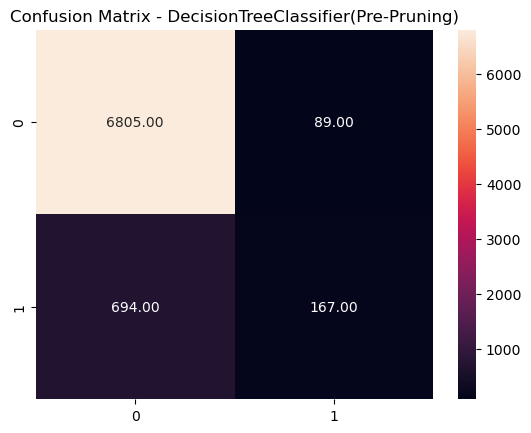

In [675]:
# Generate and display the confusion matrix
conf_matrix_pree_dtree = confusion_matrix(y_test, pre_dtree_y_pred_test)
conf_matrix_pree_dtree = confusion_matrix(y_test, pre_dtree_y_pred_test)
sns.heatmap(conf_matrix_pree_dtree, annot=True, fmt='.2f')
plt.title("Confusion Matrix - DecisionTreeClassifier(Pre-Pruning)")
plt.show()

In [676]:
y_train[:3]

34767    0
32132    0
9868     0
Name: Loan_Status_label, dtype: int64

In [677]:
pre_dtree_y_pred_train[:3]

array([0, 0, 0], dtype=int64)

## XGBoostClassifier

In [678]:
from xgboost import XGBClassifier

In [679]:
xgb = XGBClassifier(gamma=0.7, reg_alpha=0.5, reg_lambda=0.2)
xgb.fit(X_train ,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.7, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [680]:
y_pred_xgb_train = xgb.predict(X_train)
y_pred_xgb_test = xgb.predict(X_test)

In [681]:
accuracy_xgb_train = accuracy_score(y_train,y_pred_xgb_train)
accuracy_xgb_test = accuracy_score(y_test,y_pred_xgb_test)

In [682]:
print(f"Training Accuracy: ",accuracy_xgb_train*100)
print(f"Test Accuracy: ",accuracy_xgb_test*100)

Training Accuracy:  89.14108847046685
Test Accuracy:  89.87749838813669


In [683]:
# Generate and print the classification report
print(classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6894
           1       0.65      0.19      0.29       861

    accuracy                           0.90      7755
   macro avg       0.78      0.59      0.62      7755
weighted avg       0.88      0.90      0.87      7755



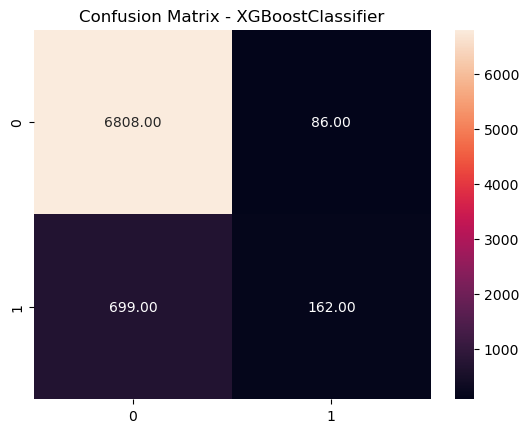

In [684]:
# Generate and display the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb_test)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='.2f')
plt.title("Confusion Matrix - XGBoostClassifier")
plt.show()

## Hyperparameter Tuning

In [685]:
parameters = {
    'n_estimators' : [100, 200],
    'learning_rate' : [0.1,0.01,1.0,0.05],
    'max_depth' : [3,4,5],
    'gamma' : [0.2,0.3],
    'reg_alpha' : [0.1,1,0.2],
    'reg_lambda' : [0.1,1]    
}

parameters

{'n_estimators': [100, 200],
 'learning_rate': [0.1, 0.01, 1.0, 0.05],
 'max_depth': [3, 4, 5],
 'gamma': [0.2, 0.3],
 'reg_alpha': [0.1, 1, 0.2],
 'reg_lambda': [0.1, 1]}

In [686]:
# perform GridSearchCV

grid_search = GridSearchCV(estimator=xgb, param_grid=parameters, scoring='accuracy', cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.891 total time=   0.0s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.894 total time=   0.0s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.890 total time=   0.0s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.891 total time=   0.0s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.886 total time=   0.0s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.892 total time=   0.0s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.894 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.7,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.2, 0.3],
                         'learning_rate': [0.1, 0.01, 1.0, 0.05],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200],
                         'reg_alpha': [0.1, 1, 0.2], 'reg_lambda': [0.1, 1]},
             scoring='accuracy', verbose=3)

In [687]:
grid_search.best_params_

{'gamma': 0.3,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 200,
 'reg_alpha': 1,
 'reg_lambda': 0.1}

In [688]:
y_pred_grid_train = grid_search.predict(X_train)
y_pred_grid_test = grid_search.predict(X_test)

In [689]:
accuracy_grid_train = accuracy_score(y_train,y_pred_grid_train)
accuracy_grid_test = accuracy_score(y_test,y_pred_grid_test)

In [690]:
print(f'Training Accuracy : {accuracy_grid_train*100}')
print(f'Test Accuracy : {accuracy_grid_test*100}')

Training Accuracy : 89.15076089760123
Test Accuracy : 89.86460348162475


## Model Comparison based on Test and Training Accuracy

In [691]:
metrics_dict = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
}

for model_name, train_accuracy, test_accuracy in [
    ('Logistic Regression', lr_train_accuracy*100, lr_test_accuracy*100),
    ('AdaboostClassifier', accuracy_ada_train*100, accuracy_ada_test*100),
    ('KNN', accuracy_knn_train*100, accuracy_knn_test*100),
    ('Decision Tree (Post-Pruning)', accuracy_dtree_post_train*100, accuracy_dtree_post_test*100),
    ('Decision Tree (Pre-Pruning)', accuracy_pre_dtree_train*100, accuracy_pre_dtree_test*100),
    ('XGBoostClassifier', accuracy_grid_train*100 ,accuracy_grid_test*100)
]:
    metrics_dict['Model'].append(model_name)
    metrics_dict['Train Accuracy'].append(train_accuracy)
    metrics_dict['Test Accuracy'].append(test_accuracy)

metrics_df = pd.DataFrame(metrics_dict)
metrics_df

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,89.076606,89.851709
1,AdaboostClassifier,89.102399,89.941973
2,KNN,89.131416,89.696970
3,Decision Tree (Post-Pruning),89.231364,89.916183
4,Decision Tree (Pre-Pruning),89.102399,89.903288
5,XGBoostClassifier,89.150761,89.864603


## Model Selected - AdaboostClassifier

In [692]:
# Function to make Loan aprroval prediction
def predict_loan_status(ada, pdays, previous, no_previous_contact, poutcome_success):

    # Create a DataFrame with user input
    user_input = pd.DataFrame({
        'pdays': [pdays],
        'previous': [previous],
        'no_previous_contact': [no_previous_contact],
        'poutcome_success': [poutcome_success]
    })

    # Make prediction
    prediction = ada.predict(user_input)[0]

    # Map prediction to loan status label
    if prediction == 1:
      loan_status = 'Loan Approved'
    else:
      loan_status = 'Loan Rejected'

    return loan_status

# Getting user input
pdays = int(input("Enter number of days since the client was last contacted('0' means never contacted): "))
previous = int(input("Enter number of contacts performed before this campaign for the client: "))
no_previous_contact = int(input("Enter whether client did have previous contacts or not('1': no contact or '0': had previous contacts): "))
poutcome_success = int(input("Enter previous campaign outcome('1':success or '0':no success): "))

# Printing prediction
loan_status = predict_loan_status(ada, pdays, previous, no_previous_contact, poutcome_success)
print(f"Predicted Loan Status: {loan_status}")

Predicted Loan Status: Loan Rejected
